In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from data_analysis import *

In [13]:
data = loadData()
data

,Unnamed: 0,network,name,func,k,bias,numPI,time_PI,ks,time_sym,...,time_cov,ke,tss,correct,timeout,time_sym_std,ks_norm,ke_norm,source,version
0,0,Apoptosis Network,Cas3,0111111100000000,4,0.4375,3,0.000144,1.3125,0.000307,...,0.001299,1.625000,"[[['1222', [], []], ['2000', [], []]], [['0122...",True,False,0.000009,0.328125,0.406250,cc,new
1,1,Apoptosis Network,Cas12,01,1,0.5000,1,0.000025,0.0000,0.000184,...,0.000044,1.000000,"[[['0', [], []]], [['1', [], []]]]",True,False,0.000016,0.000000,1.000000,cc,new
2,2,Apoptosis Network,IAP,0011000000100000,4,0.1875,3,0.000125,0.3750,0.000297,...,0.000359,1.520833,"[[['2122', [], []], ['2202', [], []], ['1221',...",True,False,0.000025,0.093750,0.380208,cc,new
3,3,Apoptosis Network,cFLIP,01,1,0.5000,1,0.000025,0.0000,0.000194,...,0.000044,1.000000,"[[['0', [], []]], [['1', [], []]]]",True,False,0.000014,0.000000,1.000000,cc,new
4,4,Apoptosis Network,TRADD,01,1,0.5000,1,0.000025,0.0000,0.000171,...,0.000044,1.000000,"[[['0', [], []]], [['1', [], []]]]",True,False,0.000014,0.000000,1.000000,cc,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,3457,Yeast Apoptosis,Mating,01,1,0.5000,1,0.000059,NaN,0.001041,...,NaN,0.000000,"[[('0', [], [])], [('1', [], [])]]",True,False,0.000205,NaN,0.000000,cc,v0.1.2
6920,3458,Yeast Apoptosis,AceticAcid,01,1,0.5000,1,0.000041,NaN,0.000965,...,NaN,0.000000,"[[('0', [], [])], [('1', [], [])]]",True,False,0.000021,NaN,0.000000,cc,v0.1.2
6921,3459,Yeast Apoptosis,Salt,01,1,0.5000,1,0.000044,NaN,0.000999,...,NaN,0.000000,"[[('0', [], [])], [('1', [], [])]]",True,False,0.000050,NaN,0.000000,cc,v0.1.2
6922,3460,Yeast Apoptosis,AbnormalTelomer,01,1,0.5000,1,0.000041,NaN,0.000974,...,NaN,0.000000,"[[('0', [], [])], [('1', [], [])]]",True,False,0.000013,NaN,0.000000,cc,v0.1.2


In [44]:
A = data[(data["timeout"]==True)&(data["version"]=="new")]
B = data[(data["timeout"]==False)&(data["version"]=="v0.1.2")]
A.merge(B, on="Unnamed: 0").sort_values("correct_y").drop_duplicates(subset="func_x")

,Unnamed: 0,network_x,name_x,func_x,k_x,bias_x,numPI_x,time_PI_x,ks_x,time_sym_x,...,time_cov_y,ke_y,tss_y,correct_y,timeout_y,time_sym_std_y,ks_norm_y,ke_norm_y,source_y,version_y
7,2293,Signal Transduction in Fibroblasts,Src,0000010100000101000001010000010100110111001101...,11,0.684082,14,0.282407,NaN,NaN,...,NaN,2.535633,"[[('12222221222', [], [[0, 7], [1, 2, 3, 4, 5,...",False,False,0.026516,NaN,0.230512,cc,v0.1.2
8,2298,Signal Transduction in Fibroblasts,Tiam,0000000000010101000000000011111100000000010101...,8,0.574219,18,0.008048,NaN,NaN,...,NaN,2.779948,"[[('22022002', [[0, 2, 3, 5, 6, 7]], [[0, 2, 4...",False,False,0.001121,NaN,0.347493,cc,v0.1.2
13,3404,Yeast Apoptosis,ROS-CYT,0111111111111111111111111111111101110111111111...,12,0.998047,11,2.397907,NaN,NaN,...,NaN,1.159371,"[[('001000100202', [], [[0, 1, 3, 4, 5, 7, 8, ...",False,False,0.063742,NaN,0.096614,cc,v0.1.2
0,803,EGFR & ErbB Signaling,shc,0111111111111111111111111111111111111111111111...,8,0.996094,8,0.017573,NaN,NaN,...,NaN,1.027344,"[[('00000000', [], [[0, 1, 2, 3, 4, 5, 6, 7]])...",True,False,0.019952,NaN,0.128418,cc,v0.1.2
1,815,EGFR & ErbB Signaling,erbb13,0000000000000000000000000000000000000000000000...,12,0.093506,8,1.767212,NaN,NaN,...,NaN,1.462457,"[[('222222222202', [[5, 10]], [[0, 1]]), ('200...",True,False,0.004118,NaN,0.121871,cc,v0.1.2
2,826,EGFR & ErbB Signaling,erbb44,0000000001111111000000001111111100000000111111...,8,0.496094,7,0.014727,NaN,NaN,...,NaN,1.531250,"[[('00002000', [], [[0, 1, 2, 3, 5, 6, 7]]), (...",True,False,0.003871,NaN,0.191406,cc,v0.1.2
3,839,EGFR & ErbB Signaling,erbb14,0000000000000000000000000000000000000000000000...,12,0.062256,8,1.908182,NaN,NaN,...,NaN,1.259619,"[[('222222222022', [[5, 9]], [[0, 1]]), ('2222...",True,False,0.009609,NaN,0.104968,cc,v0.1.2
4,844,EGFR & ErbB Signaling,erbb11,1111111111111111111111111111111111111111111111...,10,0.624023,8,0.110283,NaN,NaN,...,NaN,1.825439,"[[('2122202222', [], [[0, 2, 3, 4, 6, 7, 8, 9]...",True,False,0.010551,NaN,0.182544,cc,v0.1.2
5,1190,HH Pathway of Drosophila Signaling Pathways,Hh,0000000000000000000000000000000000000000000000...,8,0.003906,8,0.018018,NaN,NaN,...,NaN,1.027344,"[[('20222222', [[0, 1, 2, 3, 4, 5, 6, 7]], [[0...",True,False,0.014788,NaN,0.128418,cc,v0.1.2
6,1663,Influenza A Virus Replication Cycle,M1_M1,0100000000000000000000000000000000000000000000...,9,0.001953,9,0.059610,NaN,NaN,...,NaN,1.015625,"[[('221222222', [[0, 1, 2, 3, 4, 5, 6, 7]], [[...",True,False,0.022579,NaN,0.112847,cc,v0.1.2


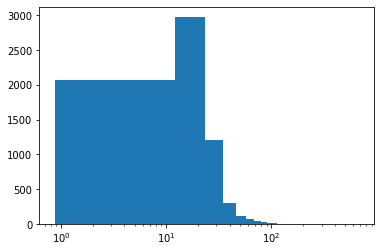

In [15]:
plt.hist(data["time_sym"]/data["time_sym_std"], bins=60)
plt.xscale("log")
# [x for x in list(data["time_sym"]/data["time_sym_std"]) if x < 2]